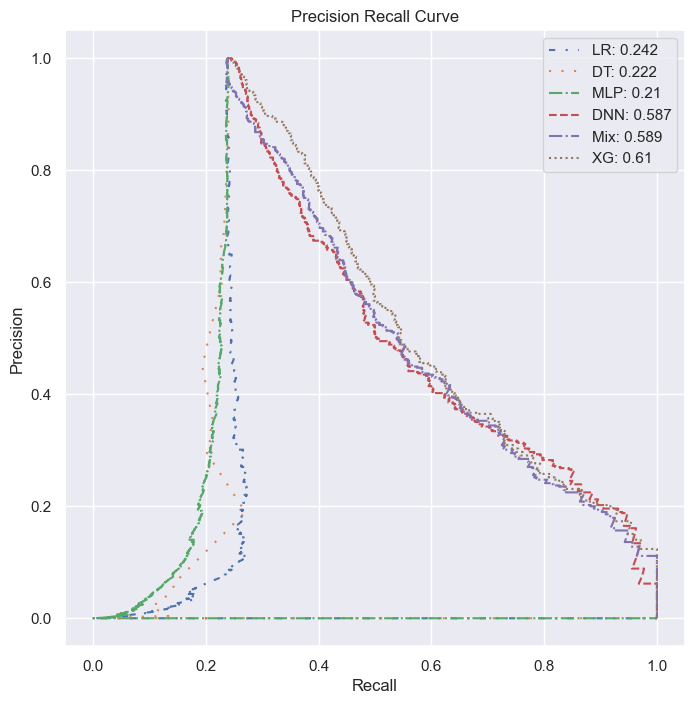

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

res = pd.read_excel("model_performances_use-target_sub.xlsx", engine="openpyxl")

fpr1 , tpr1, thresholds1 = precision_recall_curve(res['label'], res['Score_lr'])
auc1 = average_precision_score(res['label'], res['Score_lr']).round(3)

fpr2 , tpr2, thresholds2 = precision_recall_curve(res['label'], res['Score_dt'])
auc2 = average_precision_score(res['label'], res['Score_dt']).round(3)

fpr3 , tpr3, thresholds3 = precision_recall_curve(res['label'], res['Score_xgboost'])
auc3 = average_precision_score(res['label'], res['Score_xgboost']).round(3)

fpr4 , tpr4, thresholds4 = precision_recall_curve(res['label'], res['Score_mlp'])
auc4 = average_precision_score(res['label'], res['Score_mlp']).round(3)

fpr5 , tpr5, thresholds5 = precision_recall_curve(res['label'], res['Score_dnn'])
auc5 = average_precision_score(res['label'], res['Score_dnn']).round(3)

fpr6 , tpr6, thresholds5 = precision_recall_curve(res['label'], res['Score_ensemble'])
auc6 = average_precision_score(res['label'], res['Score_ensemble']).round(3)

sns.set_theme()

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 5))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 5, 1, 5))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, label= f"LR: {auc1}", linestyle=linestyle_tuple[7][1])
plt.plot(fpr2, tpr2, label= f"DT: {auc2}", linestyle=linestyle_tuple[0][1])
plt.plot(fpr4, tpr4, label= f"MLP: {auc4}", linestyle="-.")
plt.plot(fpr5, tpr5, label= f"DNN: {auc5}", linestyle="--")
plt.plot(fpr6, tpr6, label= f"Mix: {auc6}", linestyle="-.")
plt.plot(fpr3, tpr3, label= f"XG: {auc3}", linestyle=":")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision Recall Curve')
plt.savefig("PRC.tiff", dpi=300)
plt.show()

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score

def compute_metrics(df, label_col, prob_col, model_name):
    label = df[label_col]
    prob = df[prob_col]
    pred = prob.map(lambda x: 1 if x >= 0.5 else 0)
    
    auroc = roc_auc_score(label, prob).round(4)
    auprc = average_precision_score(label, prob).round(4)
    f1 = f1_score(label, pred).round(4)
    precision = precision_score(label, pred).round(4)
    recall = recall_score(label, pred).round(4)
    
    return [model_name, auroc, auprc, f1, precision, recall]

res = pd.read_excel("model_performances_use-target_sub.xlsx", engine="openpyxl")

score_list = ["Score_lr", "Score_dt", "Score_mlp", "Score_dnn", "Score_xgboost", "Score_ensemble"]
model_name_list = ["LR", "DT", "MLP", "DNN", "XGB", "Ensemble"]

res_df = []
for s, m in zip(score_list, model_name_list):
    res_df.append(compute_metrics(res, "label", s, m))
    
res_df = pd.DataFrame(res_df, columns=["ModelName", "AUROC", "AUPRC", "F1", "Precision", "Recall"])
res_df

,ModelName,AUROC,AUPRC,F1,Precision,Recall
0,LR,0.5144,0.2420,0.3836,0.2373,1.0000
1,DT,0.4656,0.2220,0.3836,0.2373,1.0000
2,MLP,0.4673,0.2100,0.3836,0.2373,1.0000
3,DNN,0.7502,0.5873,0.4526,0.7207,0.3299
4,XGB,0.7832,0.6102,0.4425,0.7299,0.3175
5,Ensemble,0.7501,0.5886,0.3794,0.2365,0.9588
